## Scrape HTML table into Panda DataFrame

In [168]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [169]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [170]:
# Visit the Mars Temperature Data Site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

# Optional delay for loading the page
browser.is_element_present_by_css('table.table', wait_time=2)

True

In [171]:
html = browser.html
mission_soup = soup(html, 'html.parser')

In [172]:
print('Classes of each table:')
for table in mission_soup.find_all('table'):
    print(table.get('class'))

Classes of each table:
['table']


In [173]:
table = mission_soup.find('table')

## Create list for table data

In [174]:
mars_list = []
# Collect table data
for row in table.tbody.find_all('tr'):
    columns = row.find_all('td')

    if (columns != []):
        id = columns[0].text.strip()
        terrestrial_date = columns[1].text.strip()
        sol = columns[2].text.strip()
        ls = columns[3].text.strip()
        month = columns[4].text.strip()
        min_temp = columns[5].text.strip()
        pressure = columns[6].text.strip()

        mars_list.append({'id': id, 'terrestrial_date': terrestrial_date,'sol': sol, 'ls' : ls , 'month' : month, 'min_temp' : min_temp,'pressure': pressure })

## Create Data Frame from list data

In [175]:
mars_df = pd.DataFrame(mars_list)
mars_df.dtypes
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [176]:
mars_df = mars_df.astype({"id": int, "pressure": float, 'min_temp': float, 'sol': int, 'ls' :int, 'month' : int})
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

## Export DataFrame to CSV File

In [177]:
mars_df.to_csv('data/mars_data.csv', index=False)

## How Many Months Exist on Mars
Get unique lis of month to analyse

In [178]:
mars_df["month"].unique().tolist()

[6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5]

> There are 12 months based on the data

## What month on average has the lowest and highest temperature

In [179]:
# Group min temperature by month and sort from lowest to highest
mars_df.groupby('month')['min_temp'].mean().sort_values(ascending=True)

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

Text(0, 0.5, 'Min Temperature')

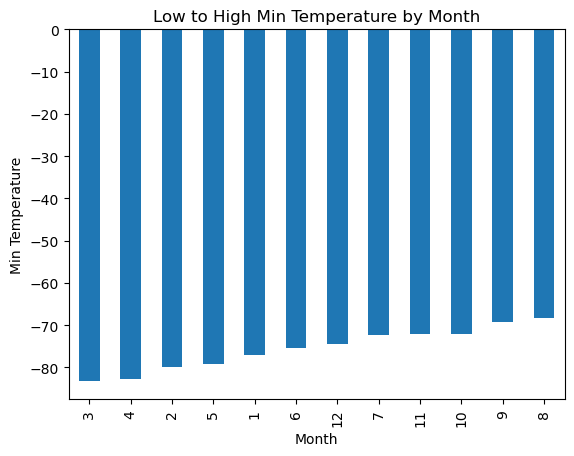

In [180]:
# Plot the temperature by month lowest to highest
import matplotlib.pyplot as plot
mars_df.groupby('month')['min_temp'].mean().sort_values(ascending=True).plot(kind = "bar", title = "Low to High Min Temperature by Month")
plot.xlabel('Month')
plot.ylabel('Min Temperature')

> The lowest temperature month on average is month 3
> The highest temperature month on aver is month 8

## What months on average has the lowest and highest  atmospheric pressure

In [181]:
mars_df.groupby('month')['pressure'].mean().sort_values(ascending=True)

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

Text(0, 0.5, 'Pressure')

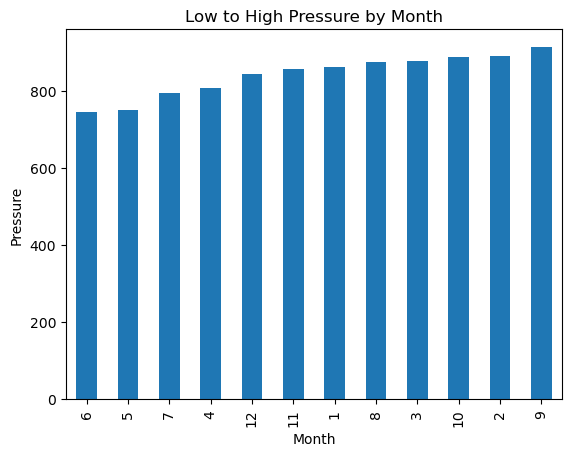

In [182]:
mars_df.groupby('month')['pressure'].mean().sort_values(ascending=True).plot(kind = "bar", title = "Low to High Pressure by Month")
plot.xlabel("Month")
plot.ylabel("Pressure")

> The lowest pressure month on average is month 6
> The highest pressure month on average is month 9

## How many terrestrial days exist in a Martian Year?

In [183]:
# Get terrestrial first date of start of first cycle around sun

from datetime import datetime, date, timedelta

ter_start_date = mars_df.loc[(mars_df.ls == 0)]["terrestrial_date"].min()

## Offset few days to account for multiple starting entries at the same ls
offset_ter_start_date = ter_start_date + timedelta(days= 10 )
ter_start_date

Timestamp('2013-08-01 00:00:00')

In [184]:
# Get terrestrial last date of end of first cycle around sun
ter_end_date = mars_df.loc[(mars_df.terrestrial_date > offset_ter_start_date) & (mars_df.ls == 0)]["terrestrial_date"].min()
ter_end_date

Timestamp('2015-06-19 00:00:00')

In [185]:
ter_end_date - ter_start_date

Timedelta('687 days 00:00:00')

> There are 687 days in a Martian Year based on the data

## Show graphical chart of min temperature by terrestrial day

Text(0, 0.5, 'Average Min Temperature')

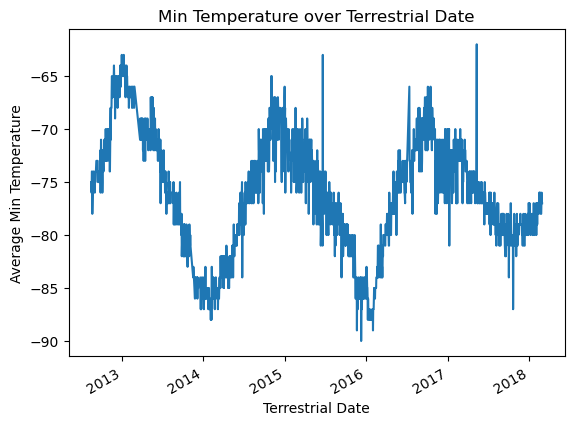

In [186]:
mars_df.groupby('terrestrial_date')['min_temp'].mean().plot(kind = "line", title = "Min Temperature over Terrestrial Date")
plot.xlabel("Terrestrial Date")
plot.ylabel("Average Min Temperature")

In [187]:
browser.quit

<bound method BaseWebDriver.quit of <splinter.driver.webdriver.chrome.WebDriver object at 0x7ff100883790>>